In [122]:
from players.tree_search_player import TreeSearchPlayer
from bayesian_snake_logic.state_generator import transform_state
from bayesian_snake_logic.tree_search import SearchTree, min_max_tree_search 
import time
import matplotlib.pyplot as plt
from scipy import stats

In [123]:
depth = 5
alpha = 0.9
timeout = 20
game_type = 'wrapped'
game_map = 'islands_and_bridges'
hazard_damage = 100
value_function = 'basic'


In [124]:
def sample_state_nodes(state, depth, alpha, accumulated_reward, timeout_start, timeout, game_type, game_map, hazard_damage):
    if depth == 0 or state.terminal:
        return state.get_sample_value()
    max_action, min_state = state.sample_max_action(timeout_start, timeout, game_type, game_map, hazard_damage, value_function)
    min_state_value = sample_state_nodes(
        min_state, depth - 1, alpha, accumulated_reward + state.reward, timeout_start, timeout, game_type, game_map, hazard_damage)
    return min_state_value * alpha


In [125]:

#state with winning strategy
def plot_before_tree_search(game_state, plot_type):
    import matplotlib.pyplot as plt
    timeout_start = time.time()
    player = TreeSearchPlayer(params, game_type, game_map, hazard_damage)
    state = transform_state(game_state, game_type, game_map, hazard_damage)
    player.search_tree.set_root_state(state, timeout_start, timeout, params, game_type, game_map, hazard_damage, value_function)
    # get the distribution of the next state
    max_action, state = player.search_tree.root_state.sample_max_action(
                timeout_start, timeout, game_type, game_map, hazard_damage, value_function)

    data_points = []
    for i in range(10000):
        data_points.append(sample_state_nodes(state, depth, alpha, 0, timeout_start, timeout, game_type, game_map, hazard_damage))


    if plot_type == 'hist':
        plt.hist(data_points, bins=100)
        plt.title('State value samples before tree search')
        plt.xlabel('State value')
        plt.ylabel('Frequency')

    elif plot_type == 'qq':
        stats.probplot(data_points, dist="norm", plot=plt)
    plt.show()

In [126]:

def plot_after_tree_search(game_state, plot_type, params):
    import matplotlib.pyplot as plt
    # distribution after the tree search
    timeout_start = time.time()
    player = TreeSearchPlayer(params, game_type, game_map, hazard_damage)
    print(player.move(game_state))
    max_action, state = player.search_tree.root_state.sample_max_action(
            timeout_start, timeout, game_type, game_map, hazard_damage, value_function)

    data_points = []
    for i in range(10000):
        data_points.append(sample_state_nodes(state, depth, alpha, 0, timeout_start, timeout, game_type, game_map, hazard_damage))

    #plot data
    if plot_type == 'hist':
        plt.hist(data_points, bins=100)
        plt.title('State value samples after tree search')
        plt.xlabel('State value')
        plt.ylabel('Frequency')
    elif plot_type == 'qq':
        stats.probplot(data_points, dist="norm", plot=plt)
    plt.show()

In [127]:
state1 = {'game': {'id': '4bdfad2f-26ed-4f0a-8935-20c5eff3ac70', 'ruleset': {'name': 'wrapped', 'version': 'v1.2.0', 'settings': {'foodSpawnChance': 15, 'minimumFood': 1, 'hazardDamagePerTurn': 100, 'hazardMap': '', 'hazardMapAuthor': '', 'royale': {'shrinkEveryNTurns': 0}, 'squad': {'allowBodyCollisions': False, 'sharedElimination': False, 'sharedHealth': False, 'sharedLength': False}}}, 'map': 'hz_islands_bridges', 'timeout': 500, 'source': 'custom'}, 'turn': 186, 'board': {'height': 11, 'width': 11, 'snakes': [{'id': 'gs_3p6Sbq8v6hcpb8R6HfxkD9VM', 'name': 'Baseline', 'latency': '49', 'health': 95, 'body': [{'x': 7, 'y': 6}, {'x': 7, 'y': 7}, {'x': 8, 'y': 7}, {'x': 8, 'y': 8}, {'x': 9, 'y': 8}, {'x': 10, 'y': 8}, {'x': 10, 'y': 7}, {'x': 9, 'y': 7}, {'x': 9, 'y': 6}, {'x': 8, 'y': 6}, {'x': 8, 'y': 5}, {'x': 8, 'y': 4}, {'x': 7, 'y': 4}], 'head': {'x': 7, 'y': 6}, 'length': 13, 'shout': '', 'squad': '', 'customizations': {'color': '#3352ff', 'head': 'default', 'tail': 'default'}}, {'id': 'gs_myWvQPf9hSydCC4jyY9cY6fX', 'name': 'Bayesian Koala', 'latency': '358', 'health': 98, 'body': [{'x': 4, 'y': 7}, {'x': 3, 'y': 7}, {'x': 2, 'y': 7}, {'x': 2, 'y': 8}, {'x': 1, 'y': 8}, {'x': 1, 'y': 9}, {'x': 2, 'y': 9}, {'x': 2, 'y': 10}, {'x': 2, 'y': 0}, {'x': 3, 'y': 0}, {'x': 3, 'y': 1}, {'x': 4, 'y': 1}, {'x': 4, 'y': 2}, {'x': 3, 'y': 2}, {'x': 2, 'y': 2}, {'x': 2, 'y': 1}, {'x': 1, 'y': 1}], 'head': {'x': 4, 'y': 7}, 'length': 17, 'shout': '', 'squad': '', 'customizations': {'color': '#3352ff', 'head': 'default', 'tail': 'default'}}], 'food': [{'x': 7, 'y': 1}, {'x': 4, 'y': 6}, {'x': 6, 'y': 6}, {'x': 4, 'y': 4}], 'hazards': [{'x': 5, 'y': 10}, {'x': 5, 'y': 9}, {'x': 5, 'y': 7}, {'x': 5, 'y': 6}, {'x': 5, 'y': 5}, {'x': 5, 'y': 4}, {'x': 5, 'y': 3}, {'x': 5, 'y': 0}, {'x': 5, 'y': 1}, {'x': 6, 'y': 5}, {'x': 7, 'y': 5}, {'x': 9, 'y': 5}, {'x': 10, 'y': 5}, {'x': 4, 'y': 5}, {'x': 3, 'y': 5}, {'x': 1, 'y': 5}, {'x': 0, 'y': 5}, {'x': 1, 'y': 10}, {'x': 9, 'y': 10}, {'x': 1, 'y': 0}, {'x': 9, 'y': 0}, {'x': 10, 'y': 1}, {'x': 10, 'y': 0}, {'x': 10, 'y': 10}, {'x': 10, 'y': 9}, {'x': 0, 'y': 10}, {'x': 0, 'y': 9}, {'x': 0, 'y': 1}, {'x': 0, 'y': 0}, {'x': 0, 'y': 6}, {'x': 0, 'y': 4}, {'x': 10, 'y': 6}, {'x': 10, 'y': 4}, {'x': 6, 'y': 10}, {'x': 4, 'y': 10}, {'x': 6, 'y': 0}, {'x': 4, 'y': 0}]}, 'you': {'id': 'gs_3p6Sbq8v6hcpb8R6HfxkD9VM', 'name': 'Baseline', 'latency': '49', 'health': 95, 'body': [{'x': 7, 'y': 6}, {'x': 7, 'y': 7}, {'x': 8, 'y': 7}, {'x': 8, 'y': 8}, {'x': 9, 'y': 8}, {'x': 10, 'y': 8}, {'x': 10, 'y': 7}, {'x': 9, 'y': 7}, {'x': 9, 'y': 6}, {'x': 8, 'y': 6}, {'x': 8, 'y': 5}, {'x': 8, 'y': 4}, {'x': 7, 'y': 4}], 'head': {'x': 7, 'y': 6}, 'length': 13, 'shout': '', 'squad': '', 'customizations': {'color': '#3352ff', 'head': 'default', 'tail': 'default'}}}
state1['you'] = state1['board']['snakes'][1]

TreeSearchPlayer initialized with parameters:
tree_min_depth: 3
tree_max_depth: 3
tree_iterations_per_depth: 3
discounting_factor: 0.9
mean_or_lcb: mean
log_state_values: False
value_function: basic


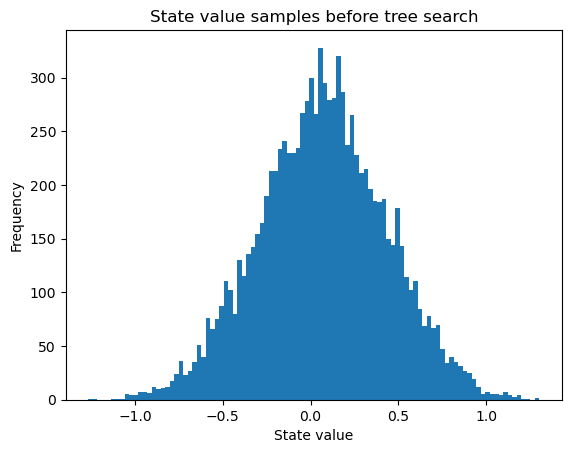

In [130]:
#winning state
plot_before_tree_search(state1, 'hist')


TreeSearchPlayer initialized with parameters:
tree_min_depth: 7
tree_max_depth: 7
tree_iterations_per_depth: 15
discounting_factor: 0.9
mean_or_lcb: mean
log_state_values: False
value_function: basic
8 0
up
{'move': 'up'}


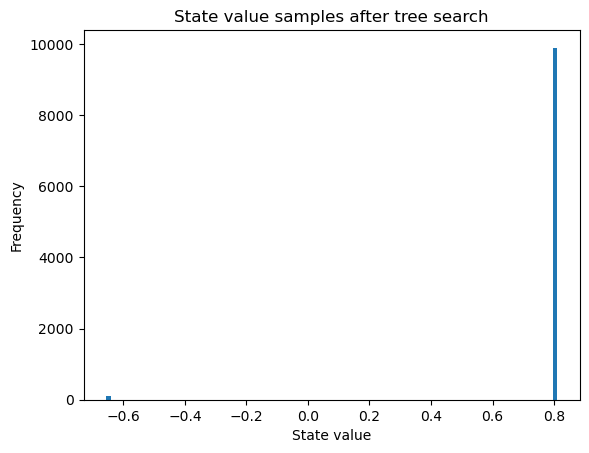

In [140]:
params = [7, 7, 15, 0.9, 'mean',False, 'basic']
plot_after_tree_search(state1, 'hist', params)